Including all the libraries and loading the dataset 

In [1]:
# Part 1: Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Load dataset
dataset_path = r"D:\gitclone\Winter-Project-Introduction-To-Machine-Learning\IITK\Assignments\Assignment 3\RUTUL_230884_IITK\Updated_Data-Melbourne_F_fixed.csv"
dataset = pd.read_csv(dataset_path)


Data Processing 

In [2]:
# Part 2: Data preprocessing (Handle missing values and drop irrelevant columns)
# Drop unnecessary columns if present
columns_to_remove = ['Year', 'Month', 'Day']
dataset = dataset.drop(columns=[col for col in columns_to_remove if col in dataset.columns], errors='ignore')

# Handle missing values
missing_values_summary = dataset.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])
dataset = dataset.fillna(dataset.mean())  # Replace missing values with mean


Missing Values Summary:
Series([], dtype: int64)


Co-relation thing

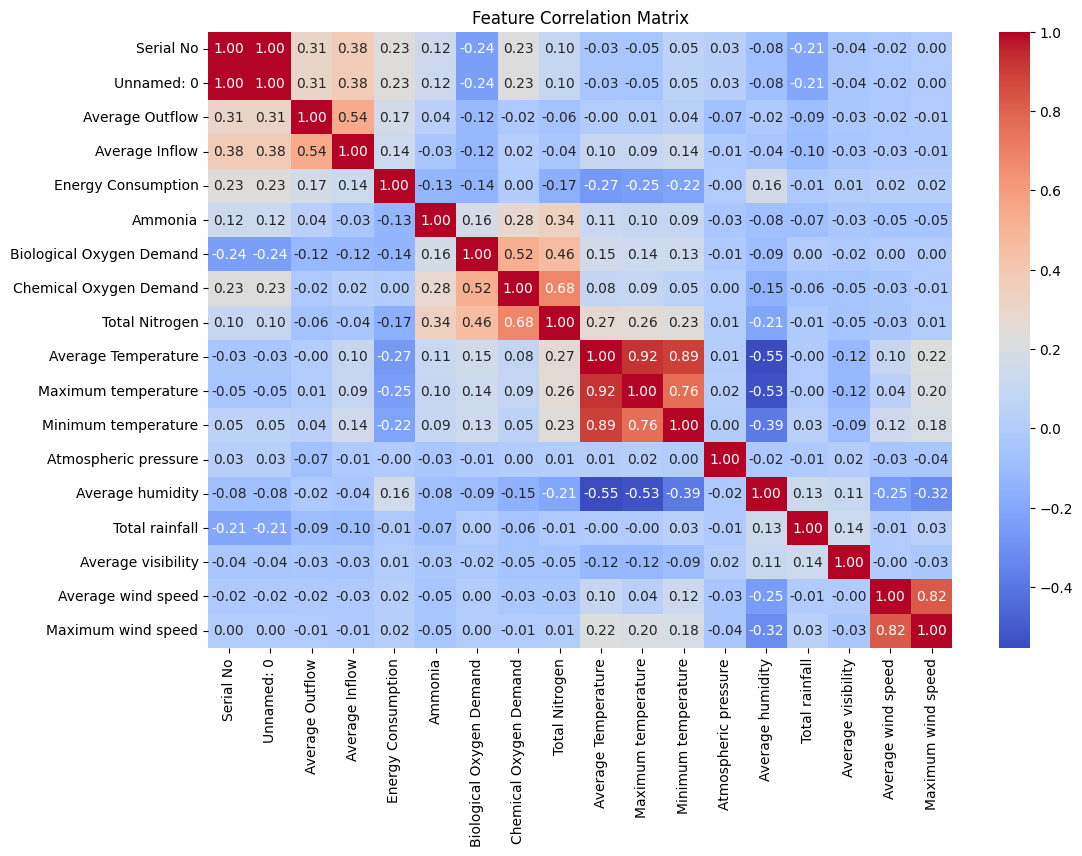

In [3]:
# Part 3: Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


Feature and Target

In [4]:
# Part 4: Define features and target variable
# Assuming 'Average Outflow' is the target variable
dataset['Binary Target'] = (dataset['Average Outflow'] > dataset['Average Outflow'].mean()).astype(int)

features = dataset.drop(['Serial No', 'Average Outflow', 'Binary Target'], axis=1)
target = dataset['Binary Target']

# Train-test split
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)


Logistic Regression

In [5]:
# Part 5: Implement logistic regression from scratch
def custom_sigmoid_function(input_value):
    return 1 / (1 + np.exp(-input_value))

def custom_logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0
    
    for iteration in range(num_iterations):
        linear_output = np.dot(X, weights) + bias
        predictions = custom_sigmoid_function(linear_output)
        
        gradient_weights = (1 / num_samples) * np.dot(X.T, (predictions - y))
        gradient_bias = (1 / num_samples) * np.sum(predictions - y)
        
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
    return weights, bias

# Train logistic regression model from scratch
model_weights, model_bias = custom_logistic_regression(
    features_train_scaled, target_train.values
)

# Predict using the custom logistic regression model
def custom_logistic_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    predictions = custom_sigmoid_function(linear_output)
    return [1 if p > 0.5 else 0 for p in predictions]

predictions_logistic_scratch = custom_logistic_predict(
    features_test_scaled, model_weights, model_bias
)


SKLearn

In [6]:
# Part 6: Train Logistic Regression and KNN models using sklearn
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(features_train_scaled, target_train)
predictions_logistic_sklearn = logistic_model.predict(features_test_scaled)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_train_scaled, target_train)
predictions_knn_sklearn = knn_model.predict(features_test_scaled)


Decision Tree and Random Forest

In [7]:
# Part 7: Train Decision Tree and Random Forest models
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(features_train, target_train)
predictions_decision_tree = decision_tree_model.predict(features_test)

# Random Forest Classifier with hyperparameter tuning
random_forest_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
random_forest_model = GridSearchCV(
    RandomForestClassifier(random_state=42), random_forest_params, cv=3, scoring='f1'
)
random_forest_model.fit(features_train, target_train)
print("Best Random Forest Parameters:", random_forest_model.best_params_)
predictions_random_forest = random_forest_model.best_estimator_.predict(features_test)


Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 100}


SVM and KNN

In [8]:
# Part 8: Train SVM model and implement KNN from scratch
# SVM with hyperparameter tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(), svm_params, cv=3, scoring='f1')
svm_model.fit(features_train_scaled, target_train)
print("Best SVM Parameters:", svm_model.best_params_)
predictions_svm_sklearn = svm_model.best_estimator_.predict(features_test_scaled)

# KNN from scratch
def knn_from_scratch(X_train, y_train, X_test, k=5):
    distances = cdist(X_test, X_train, 'euclidean')
    neighbors = np.argsort(distances, axis=1)[:, :k]
    
    predictions = []
    for i in range(neighbors.shape[0]):
        nearest_labels = y_train.iloc[neighbors[i]].values
        predictions.append(np.bincount(nearest_labels).argmax())
    
    return np.array(predictions)

predictions_knn_scratch = knn_from_scratch(
    features_train_scaled, target_train, features_test_scaled, k=5
)


Best SVM Parameters: {'C': 1, 'kernel': 'linear'}


Evaluate 


Model: Logistic Regression (Scratch)
Accuracy: 0.7833935018050542
F1 Score: 0.7247706422018348
Confusion Matrix:
 [[138  27]
 [ 33  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.75      0.71      0.72       112

    accuracy                           0.78       277
   macro avg       0.78      0.77      0.77       277
weighted avg       0.78      0.78      0.78       277



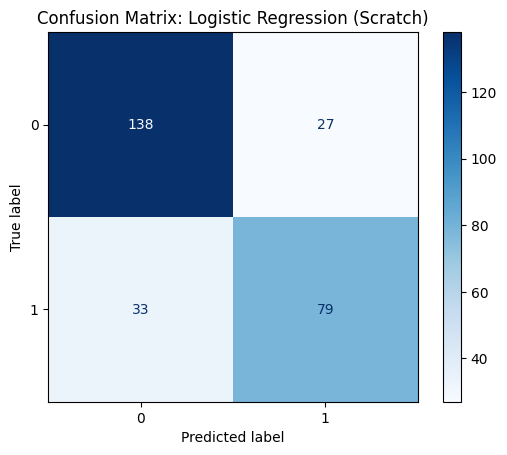


Model: Logistic Regression (sklearn)
Accuracy: 0.8050541516245487
F1 Score: 0.7522935779816514
Confusion Matrix:
 [[141  24]
 [ 30  82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       165
           1       0.77      0.73      0.75       112

    accuracy                           0.81       277
   macro avg       0.80      0.79      0.80       277
weighted avg       0.80      0.81      0.80       277



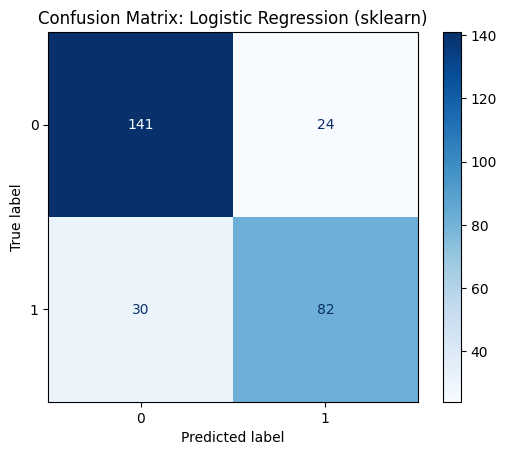


Model: K-Nearest Neighbors (sklearn)
Accuracy: 0.7617328519855595
F1 Score: 0.7053571428571429
Confusion Matrix:
 [[132  33]
 [ 33  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       165
           1       0.71      0.71      0.71       112

    accuracy                           0.76       277
   macro avg       0.75      0.75      0.75       277
weighted avg       0.76      0.76      0.76       277



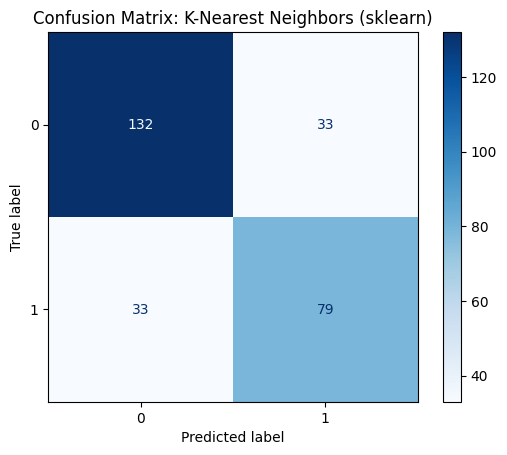


Model: Decision Tree
Accuracy: 0.779783393501805
F1 Score: 0.7312775330396476
Confusion Matrix:
 [[133  32]
 [ 29  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       165
           1       0.72      0.74      0.73       112

    accuracy                           0.78       277
   macro avg       0.77      0.77      0.77       277
weighted avg       0.78      0.78      0.78       277



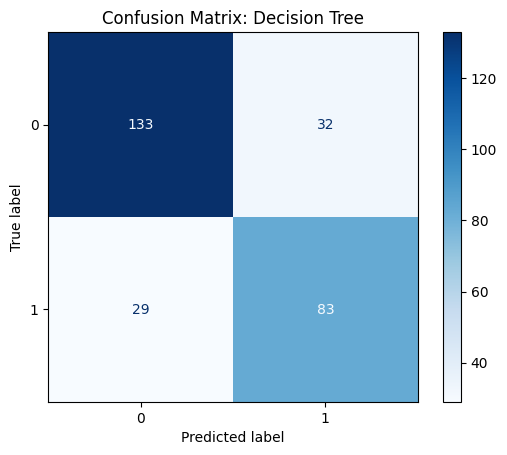


Model: Random Forest
Accuracy: 0.8158844765342961
F1 Score: 0.7935222672064778
Confusion Matrix:
 [[128  37]
 [ 14  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       165
           1       0.73      0.88      0.79       112

    accuracy                           0.82       277
   macro avg       0.81      0.83      0.81       277
weighted avg       0.83      0.82      0.82       277



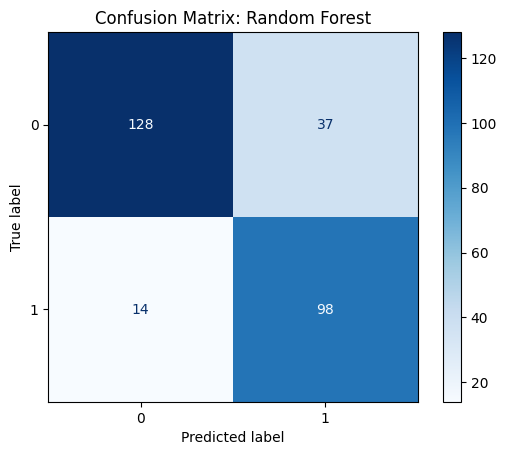


Model: Support Vector Machine (sklearn)
Accuracy: 0.8194945848375451
F1 Score: 0.7844827586206896
Confusion Matrix:
 [[136  29]
 [ 21  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       165
           1       0.76      0.81      0.78       112

    accuracy                           0.82       277
   macro avg       0.81      0.82      0.81       277
weighted avg       0.82      0.82      0.82       277



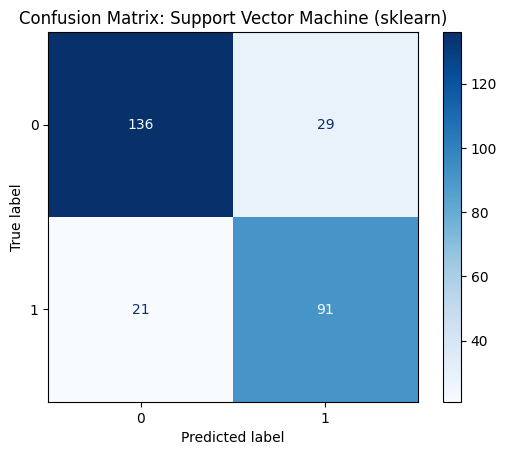


Model: K-Nearest Neighbors (Scratch)
Accuracy: 0.7617328519855595
F1 Score: 0.7053571428571429
Confusion Matrix:
 [[132  33]
 [ 33  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       165
           1       0.71      0.71      0.71       112

    accuracy                           0.76       277
   macro avg       0.75      0.75      0.75       277
weighted avg       0.76      0.76      0.76       277



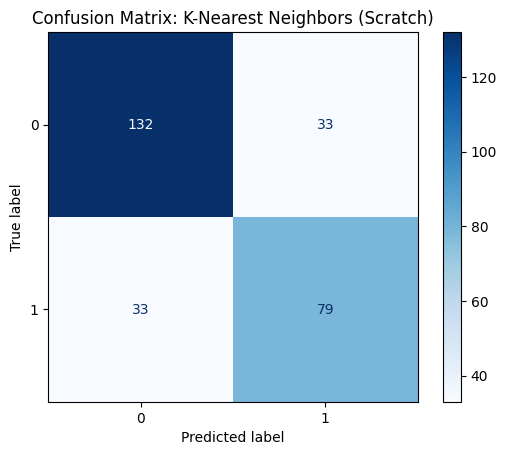

In [9]:
# Part 9: Evaluate all models
def evaluate_model(test_targets, predicted_targets, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(test_targets, predicted_targets))
    print("F1 Score:", f1_score(test_targets, predicted_targets))
    print("Confusion Matrix:\n", confusion_matrix(test_targets, predicted_targets))
    print("Classification Report:\n", classification_report(test_targets, predicted_targets))

    # Plot confusion matrix
    confusion_mat = confusion_matrix(test_targets, predicted_targets)
    display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
    display.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Evaluate predictions from different models
evaluate_model(target_test, predictions_logistic_scratch, "Logistic Regression (Scratch)")
evaluate_model(target_test, predictions_logistic_sklearn, "Logistic Regression (sklearn)")
evaluate_model(target_test, predictions_knn_sklearn, "K-Nearest Neighbors (sklearn)")
evaluate_model(target_test, predictions_decision_tree, "Decision Tree")
evaluate_model(target_test, predictions_random_forest, "Random Forest")
evaluate_model(target_test, predictions_svm_sklearn, "Support Vector Machine (sklearn)")
evaluate_model(target_test, predictions_knn_scratch, "K-Nearest Neighbors (Scratch)")


t-SNE and PCA 

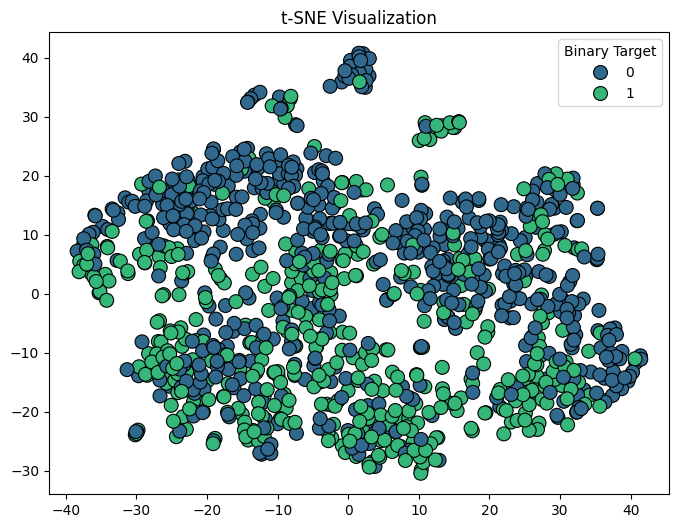

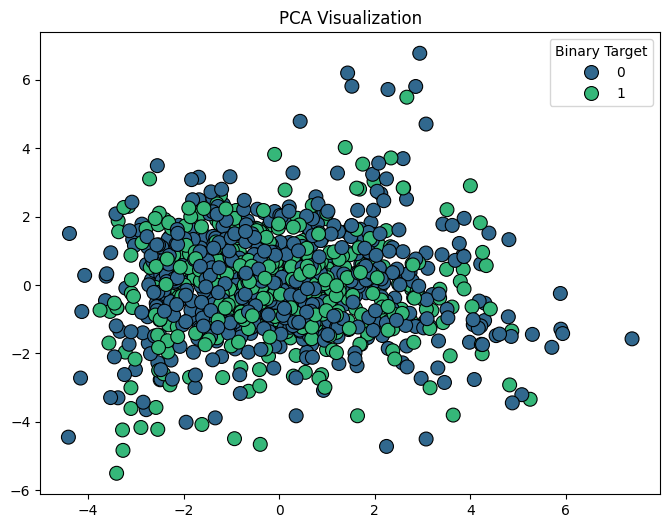

In [10]:
# Part 10: Visualize data using t-SNE and PCA
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_train_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features_tsne[:, 0],
    y=features_tsne[:, 1],
    hue=target_train,
    palette='viridis',
    s=100,
    edgecolor='k'
)
plt.title('t-SNE Visualization')
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_train_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features_pca[:, 0],
    y=features_pca[:, 1],
    hue=target_train,
    palette='viridis',
    s=100,
    edgecolor='k'
)
plt.title('PCA Visualization')
plt.show()


This part includes the changes which were asked to do. This involves HyperParameter tuning for Logistic regression and KNN.

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Model: Logistic Regression (Tuned)
Accuracy: 0.8122743682310469
F1 Score: 0.7796610169491526
Confusion Matrix:
 [[133  32]
 [ 20  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       165
           1       0.74      0.82      0.78       112

    accuracy                           0.81       277
   macro avg       0.81      0.81      0.81       277
weighted avg       0.82      0.81      0.81       277



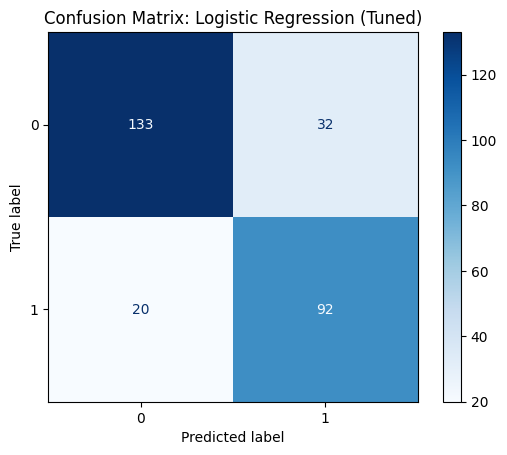

Best KNN Parameters: {'n_neighbors': 7, 'weights': 'uniform'}

Model: K-Nearest Neighbors (Tuned)
Accuracy: 0.7328519855595668
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[129  36]
 [ 38  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       165
           1       0.67      0.66      0.67       112

    accuracy                           0.73       277
   macro avg       0.72      0.72      0.72       277
weighted avg       0.73      0.73      0.73       277



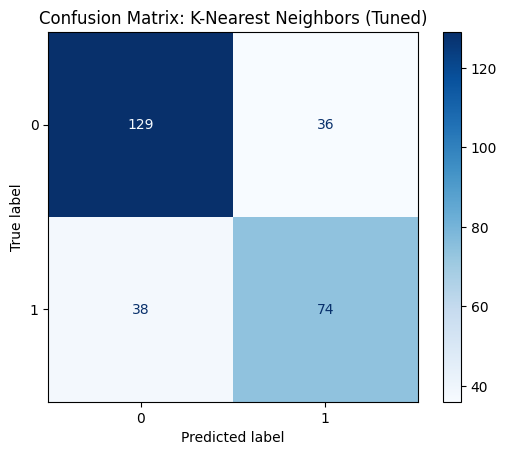

In [11]:
# Part 11: Hyperparameter Tuning for Logistic Regression and KNN
# Logistic Regression with hyperparameter tuning
logistic_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
logistic_model_tuned = GridSearchCV(
    LogisticRegression(max_iter=1000), logistic_params, cv=3, scoring='f1'
)
logistic_model_tuned.fit(features_train_scaled, target_train)
print("Best Logistic Regression Parameters:", logistic_model_tuned.best_params_)
predictions_logistic_tuned = logistic_model_tuned.best_estimator_.predict(features_test_scaled)

# Evaluate tuned Logistic Regression model
evaluate_model(target_test, predictions_logistic_tuned, "Logistic Regression (Tuned)")

# KNN with hyperparameter tuning
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_model_tuned = GridSearchCV(
    KNeighborsClassifier(), knn_params, cv=3, scoring='f1'
)
knn_model_tuned.fit(features_train_scaled, target_train)
print("Best KNN Parameters:", knn_model_tuned.best_params_)
predictions_knn_tuned = knn_model_tuned.best_estimator_.predict(features_test_scaled)

# Evaluate tuned KNN model
evaluate_model(target_test, predictions_knn_tuned, "K-Nearest Neighbors (Tuned)")